## 低阶API实现线性回归案例

范例使用TensorFlow的低阶API实现线性回归模型。

低阶API主要实现：
- 张量操作
- 计算图
- 自动微分


主要需要实现的API:
[**tf.timestamp**](返回系统当前的时间)

>tf.timestamp(name=None) Returns the timestamp as a float64 for seconds since the Unix epoch.

- 参数：name 当前操作的参数
- 返回值：float64



In [1]:
import tensorflow as tf

#打印时间分割线
@tf.function
def printbar():
    ts = tf.timestamp()

    # 计算当天时间的秒数，记录的时间的开文天文台的时间
    today_ts = ts%(24*60*60)

    # 计算当前的日期时：需要+8表示当前北京时间
    hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
    # 计算分钟
    minite = tf.cast((today_ts%3600)//60,tf.int32)
    # 计算秒钟
    second = tf.cast(tf.floor(today_ts%60),tf.int32)

    # 是否需要在前面加0
    def timeformat(m):
        if tf.strings.length(tf.strings.format("{}",m))==1:
            return(tf.strings.format("0{}",m))
        else:
            return(tf.strings.format("{}",m))

    timestring = tf.strings.join([timeformat(hour),timeformat(minite),
                timeformat(second)],separator = ":")
    tf.print("=========="*5,end = "")
    tf.print(timestring)

In [2]:
printbar()

==================================================07:30:29


### 数据准备

这里要实现的线性回归为：
Y= Xw + b
这里要实现的参数值为：
w = [2.0,-1.0]
b = 3.0

其中噪声项ϵ服从均值为0、标准差为2的正态分布。噪声代表了数据集中无意义的干扰。

API

[**tf.random.uniform**](https://tensorflow.google.cn/api_docs/python/tf/random/uniform?hl=en)

>实现均有分布，tf.random.uniform(
    shape, minval=0, maxval=None, dtype=tf.dtypes.float32, seed=None, name=None
)生成的值在minval 与 maxval之间
- shape: A 1-D integer Tensor or Python array. The shape of the output tensor.
- minval: A Tensor or Python value of type dtype, broadcastable with maxval. The lower bound on the range of random values to generate (inclusive). Defaults to 0.
- maxval: A Tensor or Python value of type dtype, broadcastable with minval. The upper bound on the range of random values to generate (exclusive). Defaults to 1 if dtype is floating point.
- dtype: The type of the output: float16, float32, float64, int32, or int64.
- seed: A Python integer. Used in combination with tf.random.set_seed to create a reproducible sequence of tensors across multiple calls.
- name: A name for the operation (optional).



[**tf.random.normal**](https://tensorflow.google.cn/api_docs/python/tf/random/normal?hl=en)

实现随机值的正态分布
>tf.random.normal(
    shape, mean=0.0, stddev=1.0, dtype=tf.dtypes.float32, seed=None, name=None
)
- shape: A 1-D integer Tensor or Python array. The shape of the output tensor.
- mean: A Tensor or Python value of type dtype, broadcastable with stddev. The mean of the normal distribution.
- stddev: A Tensor or Python value of type dtype, broadcastable with mean. The standard deviation of the normal distribution.
- dtype: The type of the output.
- seed: A Python integer. Used to create a random seed for the distribution. See tf.compat.v1.set_random_seed for behavior.
- name: A name for the operation (optional).





In [8]:
# 样本数量
n = 400

# 生成测试数据集
X = tf.random.uniform([n,2],minval=-10,maxval=10)
w0 = tf.constant([[2.0],[-1.0]])
b0 = tf.constant(3.0)
# @表示矩阵的乘法
Y = X@w0 + b0 + tf.random.normal([n,1],mean=0.0,stddev=2.0)

print(X.shape)
print(w0.shape)
print(b0.shape)
print(Y.shape)

(400, 2)
(2, 1)
()
(400, 1)


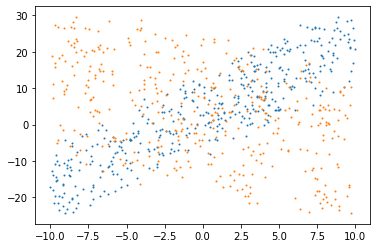

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import random

plt.scatter(X[:,0],Y,1)
plt.scatter(X[:,1],Y,1)

### 模型的建立与训练

主要的步骤：
- 计算正向传播的Y_hat值
- 计算损失函数
- 计算反向传播的gradient 值
- 更新参数

API

[**tf.squeeze**](https://tensorflow.google.cn/api_docs/python/tf/squeeze?hl=en)

将尺度大小为1的张量移除掉
>tf.squeeze(
    input, axis=None, name=None
)
- 't' is a tensor of shape [1, 2, 1, 3, 1, 1]
tf.shape(tf.squeeze(t))  # [2, 3]




In [5]:
w = tf.Variable(tf.random.normal(w0.shape))
b = tf.Variable(0.0)

def train(epoches,learning_rate=0.001):
    for epoch in tf.range(1,epoches+1):
        with tf.GradientTape() as tape:
            #正向传播
            Y_hat = X@w + b
            #求损失
            loss = tf.squeeze(tf.transpose(Y-Y_hat)@(Y-Y_hat))/(2.0*n)
    
        # 通过微分计算反向传播
        dloss_dw,dloss_db = tape.gradient(loss,[w,b])
        # 更新参数
        w.assign(w-learning_rate*dloss_dw)
        b.assign(b-learning_rate*dloss_db)

        if epoch%1000 == 0:
            printbar()
            tf.print("epoch =",epoch," loss =",loss,)
            tf.print(
                "w =",w)
            tf.print("b =",b)
            tf.print("")

In [6]:
train(5000)

==================================================07:40:29
epoch = 1000  loss = 2.56288815
w = [[1.94895029]
 [-1.03401935]]
b = 1.84497952

==================================================07:40:31
epoch = 2000  loss = 2.05567575
w = [[1.95118821]
 [-1.0250982]]
b = 2.52935719

==================================================07:40:33
epoch = 3000  loss = 1.98628843
w = [[1.95201588]
 [-1.02179909]]
b = 2.78248668

==================================================07:40:35
epoch = 4000  loss = 1.97679675
w = [[1.95232368]
 [-1.0205791]]
b = 2.87610769

==================================================07:40:37
epoch = 5000  loss = 1.97549868
w = [[1.95243716]
 [-1.0201273]]
b = 2.91073489



#### 使用autograph机制转换成静态图加速

通过加速后，从时间的对比可以很明显的感觉，确实实现了较好的加速。


In [13]:
w = tf.Variable(tf.random.normal(w0.shape))
b = tf.Variable(0.0)

@tf.function
def train2(epoches,learning_rate=0.001):
    for epoch in tf.range(1,epoches+1):
        with tf.GradientTape() as tape:
            #正向传播
            Y_hat = X@w + b
            #求损失
            loss = tf.squeeze(tf.transpose(Y-Y_hat)@(Y-Y_hat))/(2.0*n)
    
        # 通过微分计算反向传播
        dloss_dw,dloss_db = tape.gradient(loss,[w,b])
        # 更新参数
        w.assign(w-learning_rate*dloss_dw)
        b.assign(b-learning_rate*dloss_db)

        if epoch%1000 == 0:
            printbar()
            tf.print("epoch =",epoch," loss =",loss,)
            tf.print(
                "w =",w)
            tf.print("b =",b)
            tf.print("")

In [14]:
train2(5000)

==================================================08:32:50
epoch = 1000  loss = 2.52493
w = [[2.00467873]
 [-0.966536403]]
b = 1.91748667

==================================================08:32:50
epoch = 2000  loss = 1.98866975
w = [[1.99912989]
 [-0.965641201]]
b = 2.62102866

==================================================08:32:50
epoch = 3000  loss = 1.9158715
w = [[1.99708617]
 [-0.965311348]]
b = 2.88024426

==================================================08:32:51
epoch = 4000  loss = 1.90598869
w = [[1.99633157]
 [-0.965189874]]
b = 2.97575188

==================================================08:32:51
epoch = 5000  loss = 1.90464723
w = [[1.99605465]
 [-0.965144634]]
b = 3.01094174

